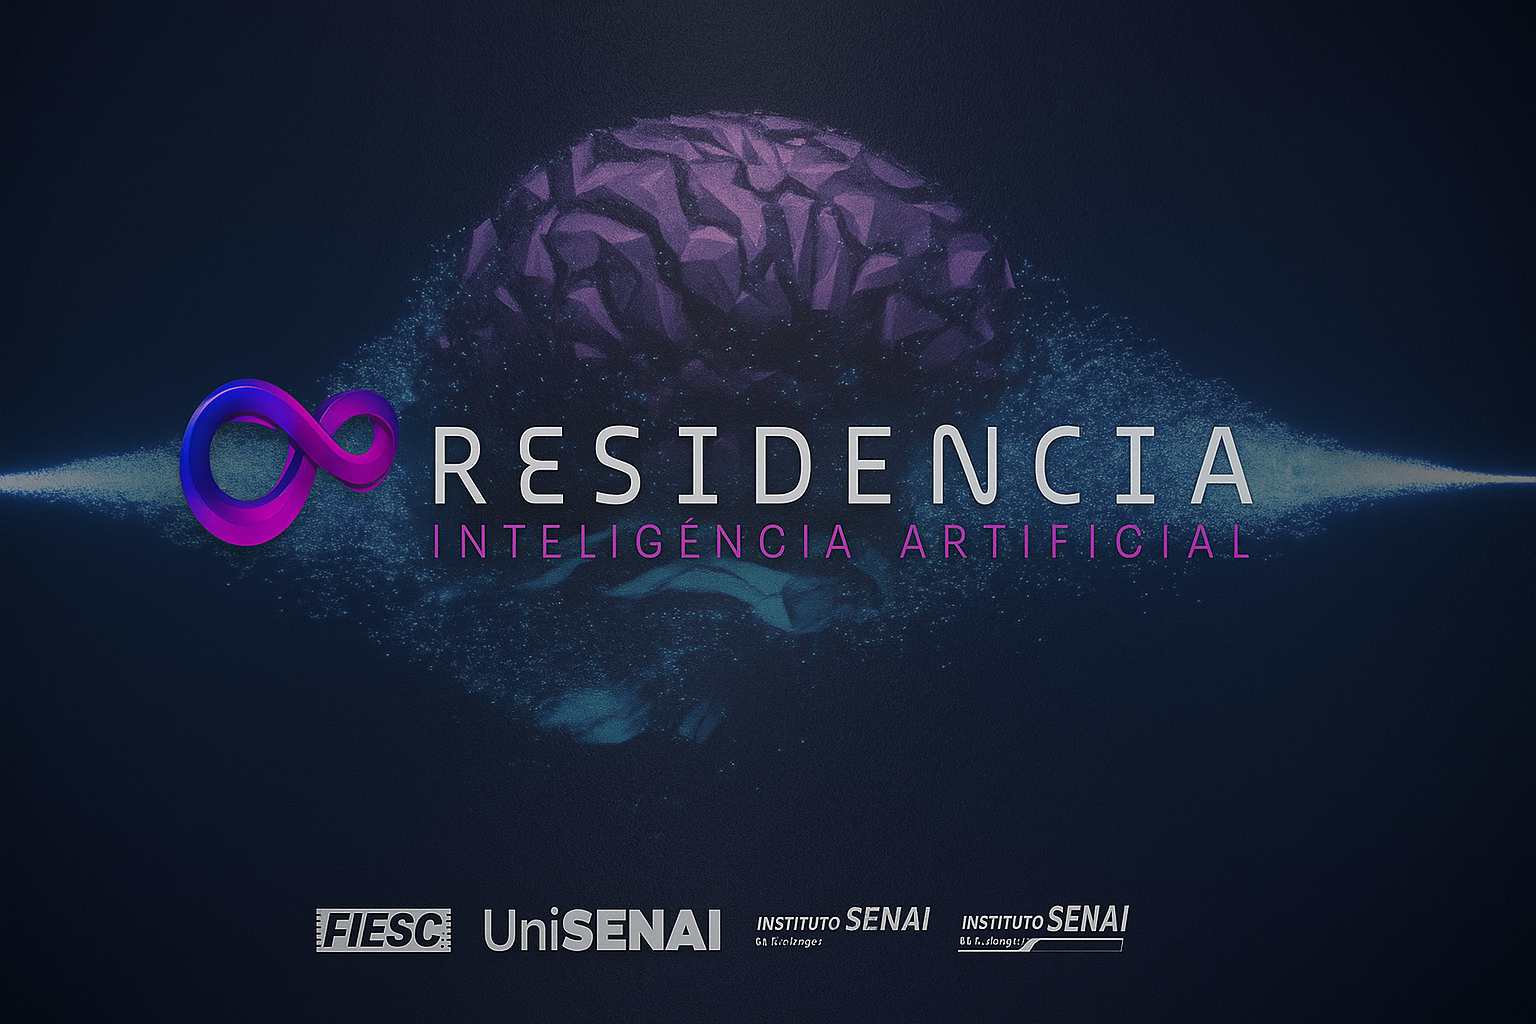

#Equipe:

1.   Julio Cesar Lümke
2.   Emanoel Spanhol
3.   Adreia Nunes Gonçalves
4.   Rosemeri Janiski Brida De Oliveira Borges





<div style="font-family: Arial, sans-serif; line-height:1.6; color:#333; max-width:900px;">

  <h1 style="color:#2E86C1; font-size:32px;">Relatório Técnico: Modelagem de Qualidade Ambiental e Riscos</h1>

  <h2 style="color:#1F618D; font-size:24px;">Objetivo do Estudo</h2>
  <p style="font-size:16px;">
    O objetivo deste estudo foi desenvolver um modelo preditivo robusto capaz de estimar múltiplos indicadores de qualidade ambiental e riscos associados, incluindo:
  </p>
  <ul style="font-size:16px;">
    <li><b>Qualidade Ambiental Geral</b></li>
    <li><b>Risco de Chuva Ácida</b></li>
    <li><b>Risco de Smog Fotoquímico</b></li>
    <li><b>Risco de Efeito Estufa</b></li>
  </ul>
  <p style="font-size:16px;">
    Para isso, utilizamos <b>Varios modelos e o RandomForest com e sem ajustes de hiperparâmetros</b>, considerando o balanceamento das classes minoritárias e salvando todos os artefatos de interesse (modelos, gráficos de matriz de confusão e métricas) para futura análise e deploy.
  </p>

  <h2 style="color:#1F618D; font-size:24px;">Abordagem Técnica</h2>
  <ol style="font-size:16px;">
    <li><b>Preparação dos dados:</b> Features normalizadas e split em treino/teste; targets multiclasse e binários tratados separadamente, com atenção às classes minoritárias.</li>
    <li><b>Modelagem:</b> Random Forest com n_estimators=500, min_samples_leaf=5 e class_weight='balanced'. Treinamento individual para cada target, com logging via MLflow e avaliação com métricas completas.</li>
    
  </ol>

  </td></tr>
  </table>

  <h2 style="color:#1F618D; font-size:24px;">Explicação dos Fatores de Risco Ambiental</h2>

  <h3 style="color:#2874A6;">1. Chuva Ácida</h3>
  <p style="font-size:16px;"><b>Combinação:</b> NO₂ + SO₂ + Umidade</p>
  <p style="font-size:16px;">
    <b>Como acontece:</b> Reação do NO₂ e SO₂ com vapor de água atmosférico, formando ácidos.  
    <b>O que gera:</b> HNO₃ e H₂SO₄ precipitam na chuva, provocando acidificação de lagos, solos, danos a florestas e corrosão de edificações.
  </p>

  <h3 style="color:#2874A6;">2. Smog Fotoquímico</h3>
  <p style="font-size:16px;"><b>Combinação:</b> NO₂ + O₃ + Temperatura</p>
  <p style="font-size:16px;">
    <b>Como acontece:</b> Luz solar e altas temperaturas catalisam reações entre NOx e compostos orgânicos voláteis, formando ozônio troposférico.  
    <b>O que gera:</b> Névoa acastanhada tóxica que causa problemas respiratórios e danos à vegetação.
  </p>

  <h3 style="color:#2874A6;">3. Efeito Estufa</h3>
  <p style="font-size:16px;"><b>Combinação:</b> CO₂ + Temperatura + Umidade</p>
  <p style="font-size:16px;">
    <b>Como acontece:</b> CO₂ aprisiona radiação infravermelha, aumentando a temperatura global.  
    <b>O que gera:</b> Maior evaporação da água, criando ciclo de retroalimentação, resultando em eventos climáticos extremos e desequilíbrio de ecossistemas.
  </p>

  <h2 style="color:#1F618D; font-size:24px;">Conclusão</h2>
  <p style="font-size:16px;">
    O modelo Random Forest ajustado demonstrou alta performance na predição de múltiplos indicadores ambientais. Ele oferece uma ferramenta confiável para monitoramento e gestão ambiental, contemplando tanto riscos binários quanto a qualidade ambiental multiclasse.
  </p>
</div>


# 1- Baixando as bibliotecas

In [1]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/7

In [5]:
!pip install pyngrok


In [6]:
# ===============================
# Imports principais
# ===============================
import os
from pathlib import Path
from google.colab import files
import mlflow.sklearn
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import zipfile
import mlflow
from mlflow.tracking import MlflowClient

# Manipulação e análise de dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import plotly.express as px
import plotly.graph_objects as go
from pyngrok import ngrok
from IPython.display import display, Markdown

# Pré-processamento e utilidades do sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Modelos clássicos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Modelos avançados
import xgboost as xgb
import lightgbm as lgb

# Métricas e avaliação
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Balanceamento e encoding
from imblearn.over_sampling import SMOTE


# Tracking e deploy
import mlflow
import gradio as gr
from huggingface_hub import HfApi, HfFolder, Repository

# Extras
import joblib
import shap

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
!pip install pyngrok

# 1.1- Fazer upload dos dados a partir do meu pc em uma pasta compactada (ZIP)

In [7]:
# ============================
# 2. Upload do Arquivo ZIP
# ==========================

uploaded = files.upload()  # selecionar o arquivo .zip no seu PC

Saving 5 - Ambiental.zip to 5 - Ambiental.zip


# 1.2- Extrair o CSV

In [8]:
# ============================
# 3. Extrair Conteúdo do ZIP
# ============================

import zipfile

# Pega automaticamente o nome do arquivo enviado
zip_path = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Ambiental")

# Listar arquivos extraídos
os.listdir("/content/Ambiental")

['5 - Ambiental']

# 1.3- Detectar e carregar o CSV

In [9]:
# Listar todos os arquivos e subpastas
for root, dirs, files in os.walk("/content/Ambiental"):
    for f in files:
        print(os.path.join(root, f))


/content/Ambiental/5 - Ambiental/dataset_ambiental.csv
/content/Ambiental/5 - Ambiental/ambiental.txt


In [10]:
csv_path = "/content/Ambiental/5 - Ambiental/dataset_ambiental.csv"
df = pd.read_csv(csv_path)
df.head()

Temperatura    Umidade           CO2         CO        Pressao_Atm  \
0    21.236204  46.154857   1540.997129  31.907228  979.8912041204417   
1    38.521429  43.303847    613.670393  22.964623  959.4817775162059   
2    31.959818  32.330774  19998.316609  48.224926  962.6359224972216   
3    27.959755  62.508667   1427.577083  10.948923  968.0671128180921   
4    14.680559  53.363691   1119.551886  29.392821  970.3653334364949   

         NO2        SO2          O3 Qualidade_Ambiental  
0  85.487475  37.336205   14.692721            Moderada  
1  51.979119  44.173992  101.135508            Moderada  
2  23.569233  23.695814   37.423834            Moderada  
3  74.980970  15.169758   41.233110            Moderada  
4  44.774423  16.623482   34.886981            Moderada

# 1.4- Analise exploratória

In [11]:
# --- ANÁLISE EXPLORATÓRIA DO DATAFRAME ---

def exploracao_df(df):
    """
    Realiza uma exploração inicial de um DataFrame do Pandas,
    exibindo informações essenciais com explicações.

    Parâmetros:
    df (pd.DataFrame): O DataFrame a ser explorado.
    """
    print("====================================================================")
    print("               INICIANDO ANÁLISE EXPLORATÓRIA DO DATAFRAME")
    print("====================================================================\n")

    # --- df.head() ---
    print("▶️ AMOSTRA DOS DADOS (PRIMEIRAS 5 LINHAS):")
    print("   Mostra as primeiras linhas do DataFrame para uma inspeção visual rápida dos dados. \n")
    display(df.head())
    print("\n" + "="*70 + "\n")

    # --- df.columns ---
    print("▶️ NOMES DAS COLUNAS:")
    print("   Exibe todos os rótulos (nomes) das colunas presentes no DataFrame. \n")
    display(df.columns)
    print("\n" + "="*70 + "\n")

    # --- df.dtypes ---
    print("▶️ TIPOS DE DADOS POR COLUNA:")
    print("   Informa o tipo de dado de cada coluna (ex: int64, float64, object para texto). \n")
    display(df.dtypes)
    print("\n" + "="*70 + "\n")

    # --- df.shape ---
    print("▶️ DIMENSÕES DO DATAFRAME (LINHAS E COLUNAS):")
    print("   Retorna uma tupla representando as dimensões do DataFrame (número_de_linhas, número_de_colunas). \n")
    display(df.shape)
    print("\n" + "="*70 + "\n")

    # --- df.info() ---
    print("▶️ INFORMAÇÕES GERAIS DO DATAFRAME:")
    print("   Fornece um resumo conciso, incluindo o tipo de índice, colunas, contagem de valores não-nulos e uso de memória. \n")
    # df.info() já printa a saída, então não usamos display()
    display(df.info())
    print("\n" + "="*70 + "\n")

    # --- df.isnull().sum() ---
    print("▶️ CONTAGEM DE VALORES NULOS (AUSENTES) POR COLUNA:")
    print("   Soma a quantidade de valores nulos (NaN) em cada coluna. Essencial para limpeza de dados. \n")
    display(df.isnull().sum())
    print("\n" + "="*70 + "\n")

    # --- VERIFICAÇÃO DE NEGATIVOS (NOVA SEÇÃO) ---
    print("▶️ VERIFICAÇÃO DE VALORES NEGATIVOS:")
    print("   Verifica as colunas numéricas para identificar a presença de valores negativos.")
    df_numerico = df.select_dtypes(include=np.number)
    negativos_encontrados = False
    if df_numerico.empty:
        print("   - Não há colunas numéricas para verificar.")
    else:
        for coluna in df_numerico.columns:
            contagem_negativos = (df_numerico[coluna] < 0).sum()
            if contagem_negativos > 0:
                print(f"   - Alerta! Coluna '{coluna}': Encontrado(s) {contagem_negativos} valor(es) negativo(s).")
                negativos_encontrados = True
        if not negativos_encontrados:
            print("   - Nenhuma coluna numérica com valores negativos foi encontrada.")
    print("\n" + "="*70 + "\n")

    # --- df.describe() ---
    print("▶️ RESUMO ESTATÍSTICO DAS COLUNAS NUMÉRICAS:")
    print("   Gera estatísticas descritivas como contagem, média, desvio padrão, mínimo, máximo e quartis. \n")
    display(df.describe())
    print("\n" + "="*70 + "\n")

    print("====================================================================")
    print("                          FIM DA ANÁLISE")
    print("====================================================================")

exploracao_df(df)

               INICIANDO ANÁLISE EXPLORATÓRIA DO DATAFRAME

▶️ AMOSTRA DOS DADOS (PRIMEIRAS 5 LINHAS):
   Mostra as primeiras linhas do DataFrame para uma inspeção visual rápida dos dados. 



Temperatura    Umidade           CO2         CO        Pressao_Atm  \
0    21.236204  46.154857   1540.997129  31.907228  979.8912041204417   
1    38.521429  43.303847    613.670393  22.964623  959.4817775162059   
2    31.959818  32.330774  19998.316609  48.224926  962.6359224972216   
3    27.959755  62.508667   1427.577083  10.948923  968.0671128180921   
4    14.680559  53.363691   1119.551886  29.392821  970.3653334364949   

         NO2        SO2          O3 Qualidade_Ambiental  
0  85.487475  37.336205   14.692721            Moderada  
1  51.979119  44.173992  101.135508            Moderada  
2  23.569233  23.695814   37.423834            Moderada  
3  74.980970  15.169758   41.233110            Moderada  
4  44.774423  16.623482   34.886981            Moderada



▶️ NOMES DAS COLUNAS:
   Exibe todos os rótulos (nomes) das colunas presentes no DataFrame. 



Index(['Temperatura', 'Umidade', 'CO2', 'CO', 'Pressao_Atm', 'NO2', 'SO2',
       'O3', 'Qualidade_Ambiental'],
      dtype='object')



▶️ TIPOS DE DADOS POR COLUNA:
   Informa o tipo de dado de cada coluna (ex: int64, float64, object para texto). 



Temperatura            float64
Umidade                float64
CO2                    float64
CO                     float64
Pressao_Atm             object
NO2                    float64
SO2                    float64
O3                     float64
Qualidade_Ambiental     object
dtype: object



▶️ DIMENSÕES DO DATAFRAME (LINHAS E COLUNAS):
   Retorna uma tupla representando as dimensões do DataFrame (número_de_linhas, número_de_colunas). 



(10000, 9)



▶️ INFORMAÇÕES GERAIS DO DATAFRAME:
   Fornece um resumo conciso, incluindo o tipo de índice, colunas, contagem de valores não-nulos e uso de memória. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperatura          9900 non-null   float64
 1   Umidade              9800 non-null   float64
 2   CO2                  10000 non-null  float64
 3   CO                   10000 non-null  float64
 4   Pressao_Atm          10000 non-null  object 
 5   NO2                  10000 non-null  float64
 6   SO2                  10000 non-null  float64
 7   O3                   10000 non-null  float64
 8   Qualidade_Ambiental  10000 non-null  object 
dtypes: float64(7), object(2)
memory usage: 703.3+ KB


None



▶️ CONTAGEM DE VALORES NULOS (AUSENTES) POR COLUNA:
   Soma a quantidade de valores nulos (NaN) em cada coluna. Essencial para limpeza de dados. 



Temperatura            100
Umidade                200
CO2                      0
CO                       0
Pressao_Atm              0
NO2                      0
SO2                      0
O3                       0
Qualidade_Ambiental      0
dtype: int64



▶️ VERIFICAÇÃO DE VALORES NEGATIVOS:
   Verifica as colunas numéricas para identificar a presença de valores negativos.
   - Nenhuma coluna numérica com valores negativos foi encontrada.


▶️ RESUMO ESTATÍSTICO DAS COLUNAS NUMÉRICAS:
   Gera estatísticas descritivas como contagem, média, desvio padrão, mínimo, máximo e quartis. 



Temperatura      Umidade           CO2            CO           NO2  \
count  9900.000000  9800.000000  10000.000000  10000.000000  10000.000000   
mean     24.818747    55.308556   1526.799620     24.935669     52.798736   
std       8.627029    20.243330   2682.748551     14.449730     27.392422   
min      10.000349    20.011042    300.081811      0.000277      5.000801   
25%      17.386090    37.780522    739.875009     12.342862     29.410865   
50%      24.775593    55.380697   1168.936432     25.001512     53.078587   
75%      32.175026    72.899768   1592.929532     37.355813     76.577367   
max      39.991530    89.994738  19998.316609     49.989469     99.994271   

                SO2            O3  
count  10000.000000  10000.000000  
mean      25.587618     64.914693  
std       14.095238     31.456487  
min        1.013236     10.014301  
25%       13.440352     37.719825  
50%       25.706263     64.915458  
75%       37.870990     92.260420  
max       49.984804    119.986261



                          FIM DA ANÁLISE


# 2- Início do tratamento dos dados, abaixo iremos deletar os valores nulos ou auxentes das colunas de Temperatura e Umidade. Motivo: estes valores representam pouco em relação a dimenção do dataset.

In [12]:
df.dropna(subset=['Temperatura', 'Umidade'], inplace=True)


# 2.1 Exploração dos dados da coluna Qualidade_Ambiental

In [13]:
# ==================================================
# 2.1 Explorar as categorias da coluna Qualidade_Ambiental
# ==================================================

print("▶️ CONTAGEM DE VALORES NA COLUNA 'Qualidade_Ambiental':")
print("   Exibe a frequência de cada categoria única nesta coluna categórica. \n")
display(df['Qualidade_Ambiental'].value_counts())

▶️ CONTAGEM DE VALORES NA COLUNA 'Qualidade_Ambiental':
   Exibe a frequência de cada categoria única nesta coluna categórica. 



Qualidade_Ambiental
Moderada      5726
Ruim          2506
Boa           1404
Muito Ruim      54
Excelente       11
Name: count, dtype: int64

# 2.2- transformando os dados da coluna Qualidade_Ambiental em valores inteiros.

In [14]:
# ==================================================
# 2.2 Transformando os dados da coluna Qualidade_Ambiental em valores inteiros
# ==================================================

# Definir o mapeamento das categorias para inteiros
qualidade_mapping = {
    'Muito Ruim': 0,
    'Ruim': 1,
    'Moderada': 2,
    'Boa': 3,
    'Excelente': 4
}

# Aplicar o mapeamento diretamente na coluna 'Qualidade_Ambiental'
df['Qualidade_Ambiental'] = df['Qualidade_Ambiental'].map(qualidade_mapping)

# Exibir as primeiras linhas do DataFrame para conferir a transformação
print("▶️ DATAFRAME COM COLUNA 'Qualidade_Ambiental' CODIFICADA:")
display(df.head())

# Verificar os tipos de dados para confirmar a transformação
print("\n▶️ TIPOS DE DADOS APÓS A CODIFICAÇÃO:")
display(df.dtypes)


▶️ DATAFRAME COM COLUNA 'Qualidade_Ambiental' CODIFICADA:


Temperatura    Umidade           CO2         CO        Pressao_Atm  \
0    21.236204  46.154857   1540.997129  31.907228  979.8912041204417   
1    38.521429  43.303847    613.670393  22.964623  959.4817775162059   
2    31.959818  32.330774  19998.316609  48.224926  962.6359224972216   
3    27.959755  62.508667   1427.577083  10.948923  968.0671128180921   
4    14.680559  53.363691   1119.551886  29.392821  970.3653334364949   

         NO2        SO2          O3  Qualidade_Ambiental  
0  85.487475  37.336205   14.692721                    2  
1  51.979119  44.173992  101.135508                    2  
2  23.569233  23.695814   37.423834                    2  
3  74.980970  15.169758   41.233110                    2  
4  44.774423  16.623482   34.886981                    2


▶️ TIPOS DE DADOS APÓS A CODIFICAÇÃO:


Temperatura            float64
Umidade                float64
CO2                    float64
CO                     float64
Pressao_Atm             object
NO2                    float64
SO2                    float64
O3                     float64
Qualidade_Ambiental      int64
dtype: object

# 2.3- Transformando os dados da coluna Pressão_Atm em float.

In [15]:
# ==================================================
# Transformando 'Pressao_Atm' para float, valores inválidos virarão NaN
# ==================================================
df['Pressao_Atm'] = pd.to_numeric(df['Pressao_Atm'], errors='coerce')

# Conferir se surgiram NaNs
print("▶️ Contagem de valores nulos após conversão:")
print(df['Pressao_Atm'].isna().sum())

# Exibir os primeiros valores para conferência
display(df[['Pressao_Atm']].head())


▶️ Contagem de valores nulos após conversão:
97


Pressao_Atm
0   979.891204
1   959.481778
2   962.635922
3   968.067113
4   970.365333

# 2.4- Removendo os valores nulos da coluna Pressão_Atm.

In [16]:
# Remover linhas onde 'Pressao_Atm' é nulo
df = df.dropna(subset=['Pressao_Atm'])

# Conferir se ainda há nulos
print("▶️ Contagem de valores nulos em 'Pressao_Atm' após remoção:")
print(df['Pressao_Atm'].isna().sum())

# Conferir o tamanho do DataFrame
print("\n▶️ Dimensões do DataFrame após remoção:")
print(df.shape)


▶️ Contagem de valores nulos em 'Pressao_Atm' após remoção:
0

▶️ Dimensões do DataFrame após remoção:
(9604, 9)


# 3- Distribuição das variaveis

2025/09/27 21:57:00 INFO mlflow.tracking.fluent: Experiment with name 'analise_exploratoria_ambiental' does not exist. Creating a new experiment.


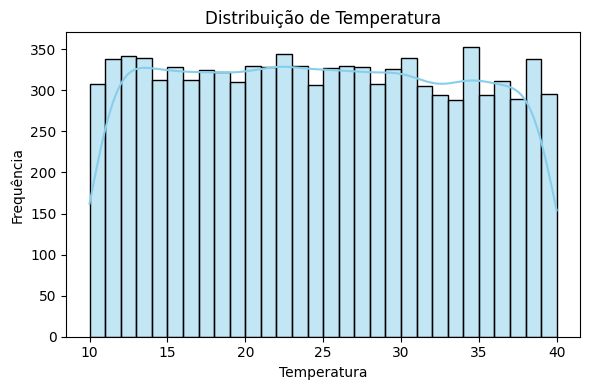

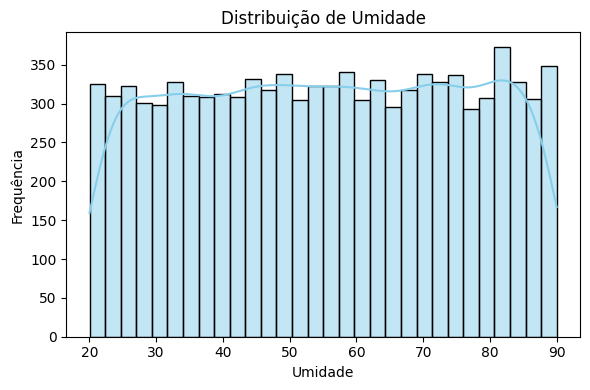

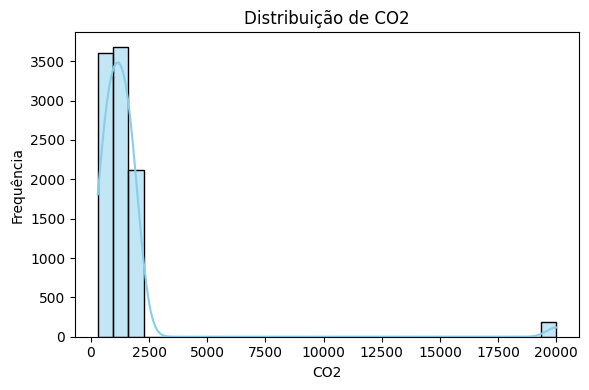

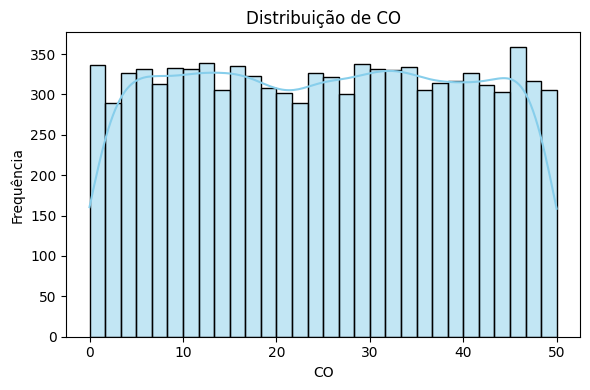

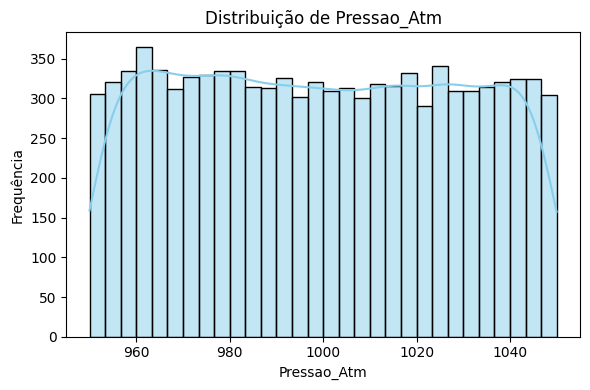

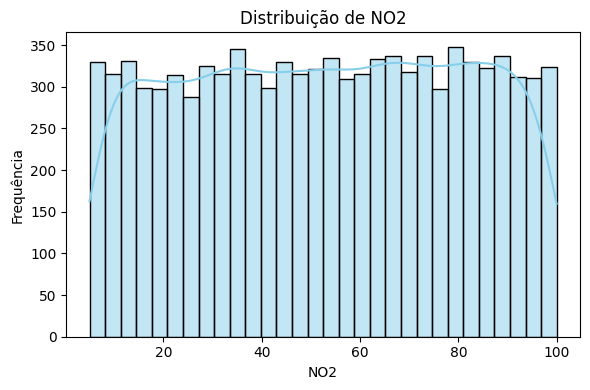

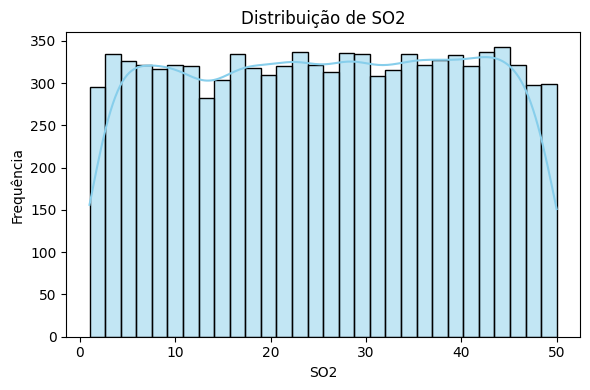

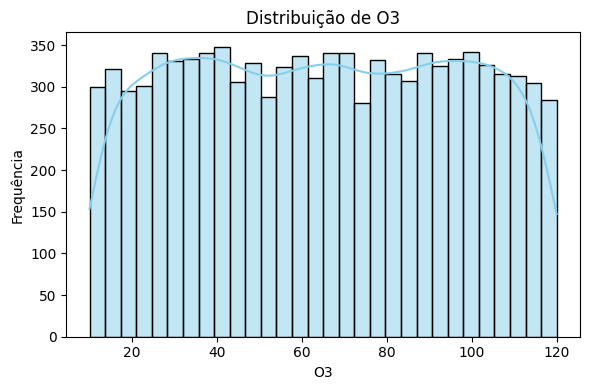

▶️ Distribuições geradas e salvas no MLflow.


In [17]:
num_cols = ['Temperatura', 'Umidade', 'CO2', 'CO', 'Pressao_Atm', 'NO2', 'SO2', 'O3']

mlflow.set_experiment("analise_exploratoria_ambiental")
with mlflow.start_run(run_name="distribuicao_variaveis"):

    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f"Distribuição de {col}")
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.tight_layout()

        # Salvar e logar no MLflow
        filename = f"{col}_distribuicao.png"
        plt.savefig(filename, dpi=100)
        mlflow.log_artifact(filename)
        plt.show()
        plt.close()

    print("▶️ Distribuições geradas e salvas no MLflow.")


# 3.1- Boxplots das variáveis

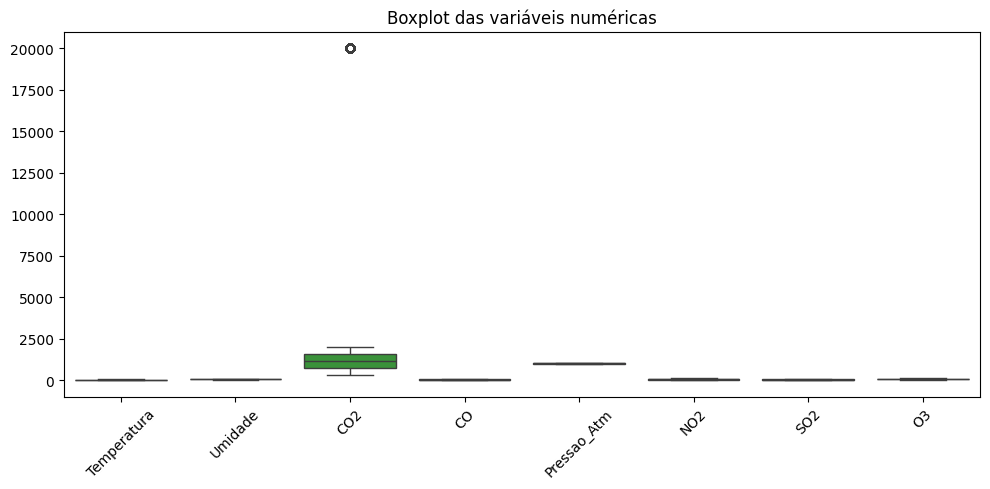

▶️ Boxplot gerado e salvo no MLflow.


In [18]:
with mlflow.start_run(run_name="boxplots_variaveis"):

    plt.figure(figsize=(10,5))
    sns.boxplot(data=df[num_cols])
    plt.xticks(rotation=45)
    plt.title("Boxplot das variáveis numéricas")
    plt.tight_layout()

    # Salvar e logar no MLflow
    boxplot_path = "boxplot_variaveis.png"
    plt.savefig(boxplot_path, dpi=100)
    mlflow.log_artifact(boxplot_path)
    plt.show()
    plt.close()

    print("▶️ Boxplot gerado e salvo no MLflow.")


# 3.2- Correlação entre a variáveis

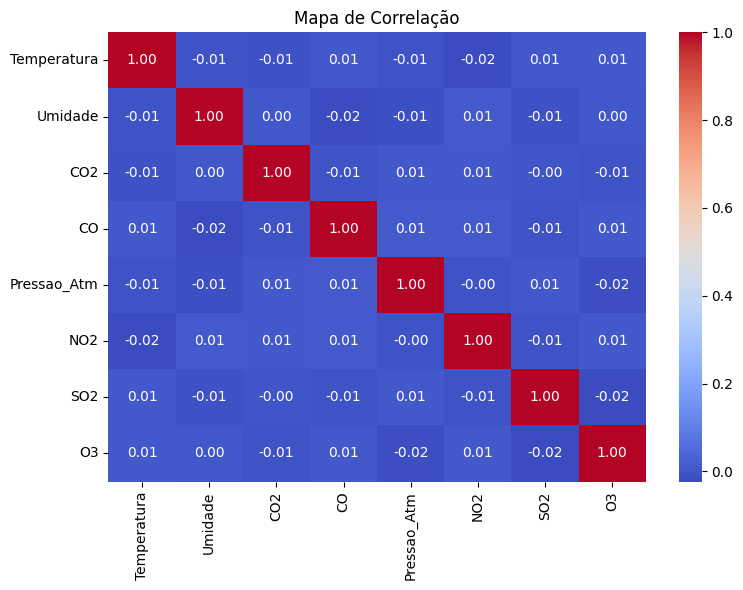

▶️ Heatmap de correlação gerado e salvo no MLflow.


In [19]:
with mlflow.start_run(run_name="correlacao_variaveis"):

    corr = df[num_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title("Mapa de Correlação")
    plt.tight_layout()

    # Salvar e logar no MLflow
    corr_path = "correlacao_variaveis.png"
    plt.savefig(corr_path, dpi=100)
    mlflow.log_artifact(corr_path)
    plt.show()
    plt.close()

    print("▶️ Heatmap de correlação gerado e salvo no MLflow.")


# 3.3- Analise de ocorrencias na coluna Qualidade_ambiental.

In [20]:
df['Qualidade_Ambiental'].value_counts()


Qualidade_Ambiental
2    5661
1    2484
3    1394
0      54
4      11
Name: count, dtype: int64

# 3.4- Redistribuição dos dados da coluna Qualidade_Ambiental para ter um numero consideravel de cada classe.

In [42]:
# Distribuição original
print("Distribuição original:\n", df['Qualidade_Ambiental'].value_counts())

# Separar os grupos
df_0 = df[df['Qualidade_Ambiental'] == 0]
df_1 = df[df['Qualidade_Ambiental'] == 1]
df_2 = df[df['Qualidade_Ambiental'] == 2]
df_3 = df[df['Qualidade_Ambiental'] == 3]
df_4 = df[df['Qualidade_Ambiental'] == 4]

# 🔄 Realocar 3000 amostras da classe 2
df_2_extra = df_2.sample(3000, random_state=42)   # reservar 3000 amostras para redistribuição
df_2_rest = df_2.drop(df_2_extra.index)           # o restante continua como classe 2

# 1500 para virar "0"
df_0_aug = pd.concat([
    df_0,
    df_2_extra.sample(1000, random_state=42).assign(Qualidade_Ambiental=0)
])

# 1500 para virar "4"
df_4_aug = pd.concat([
    df_4,
    df_2_extra.drop(df_2_extra.sample(1500, random_state=42).index).assign(Qualidade_Ambiental=4)
])

# Reunir tudo
df_balanced = pd.concat([df_0_aug, df_1, df_2_rest, df_3, df_4_aug])

# Embaralhar
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Distribuição final
print("\nDistribuição após redistribuição:\n", df_balanced['Qualidade_Ambiental'].value_counts())


Distribuição original:
 Qualidade_Ambiental
2    5661
1    2484
3    1394
0      54
4      11
Name: count, dtype: int64

Distribuição após redistribuição:
 Qualidade_Ambiental
2    2661
1    2484
4    1511
3    1394
0    1054
Name: count, dtype: int64


# 3.5- Criando a coluna Risco_Chuva_Acida Cientificamente, a chuva ácida ocorre quando temos altas concentrações de NO₂ e SO₂ reagindo com a umidade. Então, a lógica pode ser algo assim: A umidade acima dos 75% e os valores de NO2 dióxido de nitrogênio e SO2 dióxido de enxofre acima do percentil de 65% combinados.
# Isto é apenas um cenario de simulação destes fatores para aplicação real é necessário obter mais dados da OMS.

In [22]:
# Definindo limiares (percentil 75 para NO2, SO2 e Umidade)
limiar_no2 = np.percentile(df["NO2"], 65)
limiar_so2 = np.percentile(df["SO2"], 65)
limiar_umidade = np.percentile(df["Umidade"], 75)

# Criando a coluna Risco_Chuva_Acida
df["Risco_Chuva_Acida"] = np.where(
    (df["NO2"] > limiar_no2) &
    (df["SO2"] > limiar_so2) &
    (df["Umidade"] > limiar_umidade),
    1,  # Alto risco
    0   # Baixo risco
)

# Ver distribuição da nova variável
print(df["Risco_Chuva_Acida"].value_counts())


Risco_Chuva_Acida
0    9294
1     310
Name: count, dtype: int64


# 3.6- Redistribuição dos dados da coluna Risco_Chuva_Acida, aumentamos o numero das amostras do cenário de uma eventual chuva acida.

In [23]:
# Separar classes
df_0 = df[df['Risco_Chuva_Acida'] == 0]
df_1 = df[df['Risco_Chuva_Acida'] == 1]

# Quantidade desejada para a classe 1
n_target_1 = 1310

# Quantidade extra que precisamos adicionar à classe 1
n_add_1 = n_target_1 - len(df_1)

# Amostras da classe 0 que serão realocadas para 1
df_0_to_1 = df_0.sample(n=n_add_1, random_state=42)

# Atualizar a coluna para essas amostras
df.loc[df_0_to_1.index, 'Risco_Chuva_Acida'] = 1

# Mostrar nova distribuição
print(df['Risco_Chuva_Acida'].value_counts())


Risco_Chuva_Acida
0    8294
1    1310
Name: count, dtype: int64


# 3.7- Dióxido de Nitrogênio (NO₂) + Ozônio (O₃) + Temperatura Esta combinação, sob a influência da luz solar, é a base para a formação do smog fotoquímico. Usamos os valores que estão acima do percentil de 70% para as 3 variaveis combinadas o que gera algumas amostras deste fenômeno.

In [24]:
# Definir limites usando percentis
NO2_lim = df['NO2'].quantile(0.7)
O3_lim = df['O3'].quantile(0.7)
Temp_lim = df['Temperatura'].quantile(0.7)

# Criar coluna binária de risco de smog fotoquímico
df['Risco_Smog_Fotoquimico'] = ((df['NO2'] > NO2_lim) &
                                (df['O3'] > O3_lim) &
                                (df['Temperatura'] > Temp_lim)).astype(int)

# Mostrar distribuição
print(df['Risco_Smog_Fotoquimico'].value_counts())


Risco_Smog_Fotoquimico
0    9344
1     260
Name: count, dtype: int64


# 3.8- Redistribuição dos dados da coluna Risco_Smog_Fotoquimico para aumentar o meu numero de amostras.

In [25]:
# Separar classes
df_0 = df[df['Risco_Smog_Fotoquimico'] == 0]
df_1 = df[df['Risco_Smog_Fotoquimico'] == 1]

# Número desejado de amostras na classe 1
n_target_1 = 1260

# Selecionar aleatoriamente da classe 0 para transferir para 1
n_to_add = n_target_1 - len(df_1)
df_1_extra = df_0.sample(n_to_add, random_state=42).copy()
df_1_extra['Risco_Smog_Fotoquimico'] = 1

# Atualizar DataFrame
df_balanced = pd.concat([df.drop(df_1_extra.index), df_1, df_1_extra], ignore_index=True)

# Verificar distribuição final
print(df_balanced['Risco_Smog_Fotoquimico'].value_counts())


Risco_Smog_Fotoquimico
0    8344
1    1520
Name: count, dtype: int64


# 3.9- Dióxido de Carbono (CO₂) + Temperatura + Umidade
# Essa combinação é a força motriz por trás da intensificação do efeito estufa e das mudanças climáticas. Com base nisto classificamos os valores destas classes também com o percentil acima de 70%.

In [26]:
# Limites podem ser ajustados
CO2_lim = df['CO2'].quantile(0.7)
Temp_lim = df['Temperatura'].quantile(0.7)
Umid_lim = df['Umidade'].quantile(0.7)

# Nova coluna binária: alto risco efeito estufa
df['Risco_Efeito_Estufa'] = (
    ((df['CO2'] > CO2_lim).astype(int) +
     (df['Temperatura'] > Temp_lim).astype(int) +
     (df['Umidade'] > Umid_lim).astype(int)) >= 2  # 2 de 3 condições
).astype(int)

# Ver distribuição
print(df['Risco_Efeito_Estufa'].value_counts())


Risco_Efeito_Estufa
0    7531
1    2073
Name: count, dtype: int64


# 4- Visualização dos dados

In [27]:
display(df.head(10))

Temperatura    Umidade           CO2         CO  Pressao_Atm        NO2  \
0    21.236204  46.154857   1540.997129  31.907228   979.891204  85.487475   
1    38.521429  43.303847    613.670393  22.964623   959.481778  51.979119   
2    31.959818  32.330774  19998.316609  48.224926   962.635922  23.569233   
3    27.959755  62.508667   1427.577083  10.948923   968.067113  74.980970   
4    14.680559  53.363691   1119.551886  29.392821   970.365333  44.774423   
5    14.679836  80.599069   1555.570766  35.010501   974.226181  61.489611   
6    11.742508  22.247671  19998.316609  41.278224   975.546003  15.190203   
7    35.985284  65.070755    498.129369  20.348552   995.571635  65.000479   
8    28.033450  73.406421   1506.265118  34.346095  1000.957319  40.487296   
9    31.242177  73.164060    691.585065  15.160074   980.887921  36.748026   

         SO2          O3  Qualidade_Ambiental  Risco_Chuva_Acida  \
0  37.336205   14.692721                    2                  0   
1  44.173992  101.135508                    2                  0   
2  23.695814   37.423834                    2                  0   
3  15.169758   41.233110                    2                  1   
4  16.623482   34.886981                    2                  0   
5  35.150465  102.409235                    1                  0   
6  28.810344  117.679219                    1                  0   
7  24.838212   93.070532                    2                  0   
8  10.935930  100.593565                    1                  0   
9  43.897329   78.255051                    2                  0   

   Risco_Smog_Fotoquimico  Risco_Efeito_Estufa  
0                       0                    0  
1                       0                    0  
2                       0                    1  
3                       0                    0  
4                       0                    0  
5                       0                    1  
6                       0                    0  
7                       0                    0  
8                       0                    0  
9                       0                    1

# 4.1- Gerando graficos para analise das novas colunas

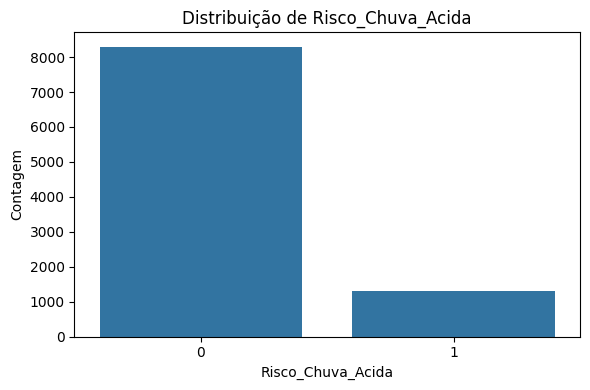

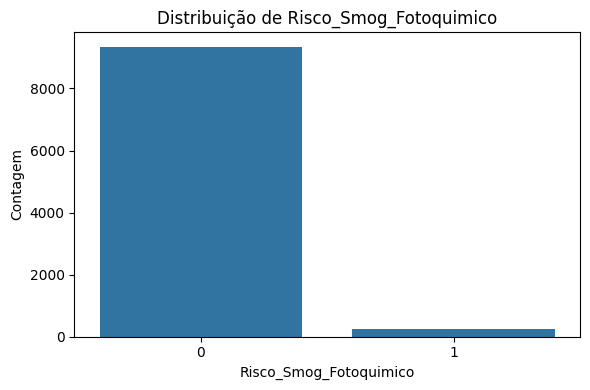

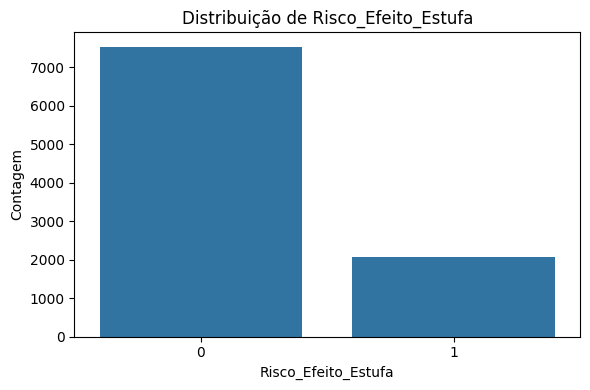

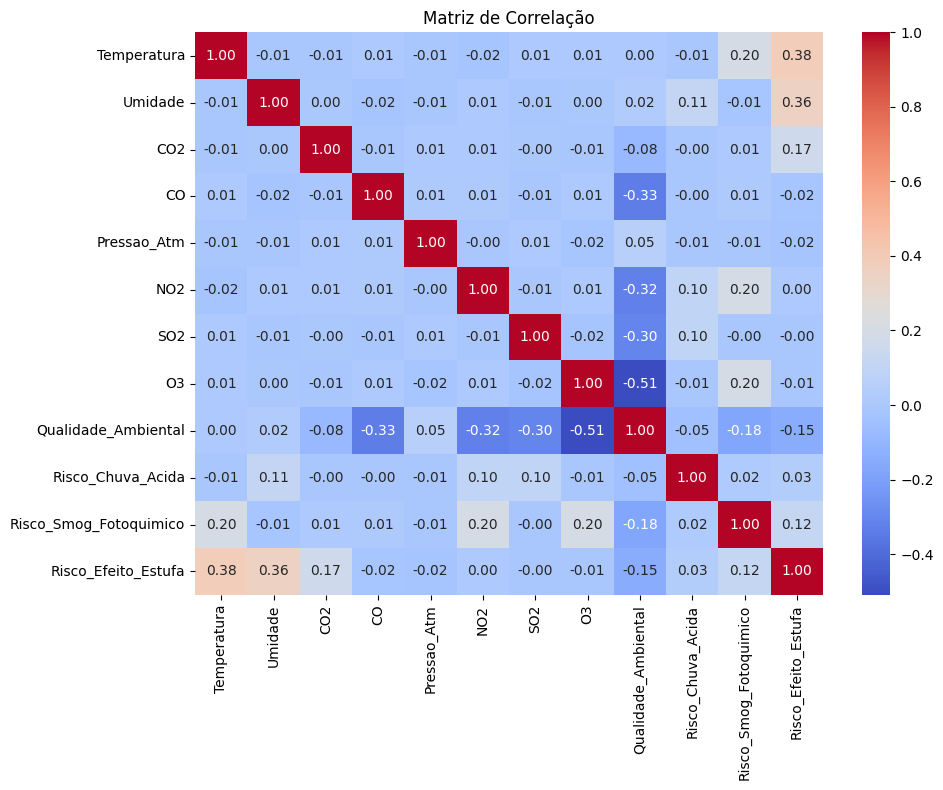

Gráficos de distribuição (3 riscos) e matriz de correlação gerados e salvos no MLflow.


In [28]:
# Garantir que a pasta para salvar gráficos exista
os.makedirs("miruns", exist_ok=True)

# Lista das colunas de risco
colunas_risco = ['Risco_Chuva_Acida', 'Risco_Smog_Fotoquimico', 'Risco_Efeito_Estufa']

with mlflow.start_run(run_name="Distribuicoes_e_Correlacoes"):

    # ---- 1️⃣ Distribuição das novas variáveis ----
    for col in colunas_risco:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col)
        plt.title(f"Distribuição de {col}")
        plt.xlabel(col)
        plt.ylabel("Contagem")
        plt.tight_layout()

        # Salvar gráfico
        plot_path = os.path.join("miruns", f"{col}_distribuicao.png")
        plt.savefig(plot_path)
        plt.show()
        plt.close()

        # Log do gráfico no MLflow
        mlflow.log_artifact(plot_path)

    # ---- 2️⃣ Matriz de correlação ----
    plt.figure(figsize=(10,8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriz de Correlação")
    plt.tight_layout()

    # Salvar gráfico
    corr_path = os.path.join("miruns", "matriz_correlacao.png")
    plt.savefig(corr_path)
    plt.show()
    plt.close()

    # Log do gráfico no MLflow
    mlflow.log_artifact(corr_path)

    print("Gráficos de distribuição (3 riscos) e matriz de correlação gerados e salvos no MLflow.")


# 5- Separação de treino 70% e teste 30% na seguencia padronização em separado.

In [29]:
# 1️⃣ Definir Features e Targets
X = df.drop(columns=['Qualidade_Ambiental',
                     'Risco_Chuva_Acida',
                     'Risco_Smog_Fotoquimico',
                     'Risco_Efeito_Estufa'])

y = df[['Qualidade_Ambiental',
        'Risco_Chuva_Acida',
        'Risco_Smog_Fotoquimico',
        'Risco_Efeito_Estufa']]

# 2️⃣ Separação treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Tamanhos dos conjuntos:")
print("Treino X:", X_train.shape, "y:", y_train.shape)
print("Teste X:", X_test.shape, "y:", y_test.shape)

# 3️⃣ Padronização das features numéricas
numeric_cols = X_train.select_dtypes(include='number').columns
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nPadronização concluída.")


Tamanhos dos conjuntos:
Treino X: (6722, 8) y: (6722, 4)
Teste X: (2882, 8) y: (2882, 4)

Padronização concluída.


# 5.1- Preparação dos dados

In [30]:
# Lista de targets
targets = ['Qualidade_Ambiental', 'Risco_Chuva_Acida', 'Risco_Smog_Fotoquimico', 'Risco_Efeito_Estufa']

# Garantir que y seja DataFrame
y = df[targets]

# Split 70/30 estratificado por 'Qualidade_Ambiental' (ou outra coluna com classes equilibradas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=df['Qualidade_Ambiental']
)

print("Tamanhos dos conjuntos:")
print("Treino:", X_train.shape, "Teste:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Tamanhos dos conjuntos:
Treino: (6722, 8) Teste: (2882, 8)
y_train: (6722, 4) y_test: (2882, 4)


# 5.2- Início dos testes com MultiOutputClassifier.

2025/09/27 21:58:17 INFO mlflow.tracking.fluent: Experiment with name 'miruns' does not exist. Creating a new experiment.



=== Métricas para Qualidade_Ambiental ===
Acurácia: 0.5895, F1: 0.4373, Precision: 0.7580, Recall: 0.5895


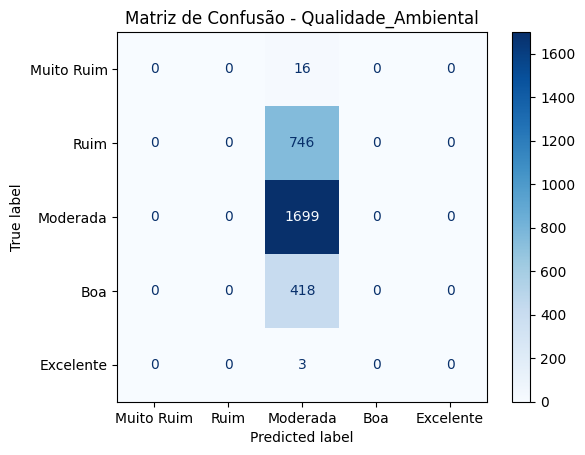


=== Métricas para Risco_Chuva_Acida ===
Acurácia: 0.8598, F1: 0.7950, Precision: 0.8795, Recall: 0.8598


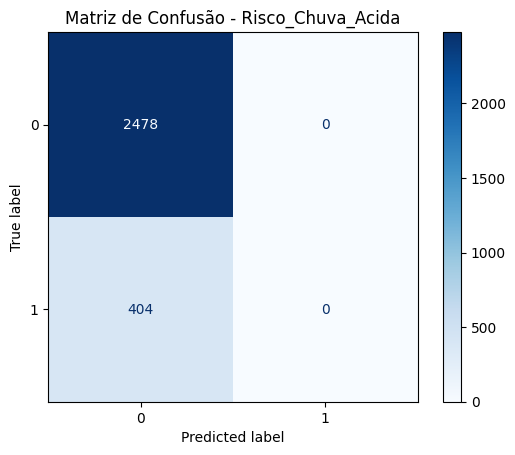


=== Métricas para Risco_Smog_Fotoquimico ===
Acurácia: 0.9688, F1: 0.9534, Precision: 0.9697, Recall: 0.9688


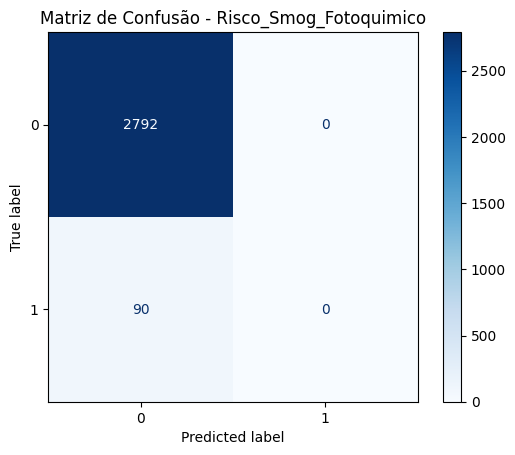


=== Métricas para Risco_Efeito_Estufa ===
Acurácia: 0.7668, F1: 0.6656, Precision: 0.8212, Recall: 0.7668


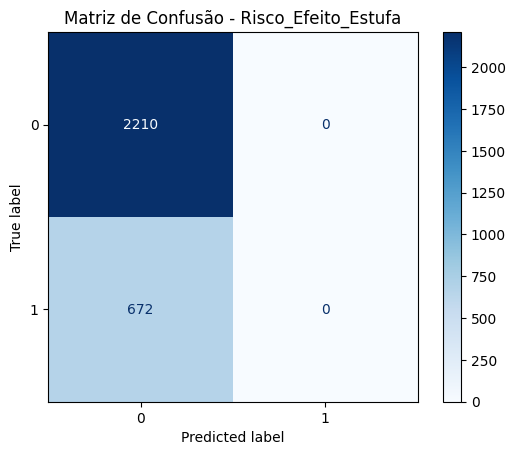

2025/09/27 21:58:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/27 21:58:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Exemplo de previsões:


Qualidade_Ambiental  Risco_Chuva_Acida  Risco_Smog_Fotoquimico  \
6559                    1                  0                       0   
1081                    2                  0                       0   
1407                    1                  0                       0   
5560                    2                  0                       0   
4670                    3                  0                       0   
5683                    2                  0                       0   
7243                    1                  0                       0   
8681                    1                  0                       0   
2264                    2                  1                       0   
1531                    2                  0                       0   
3558                    2                  0                       0   
8249                    3                  0                       0   
8778                    2                  0                       0   
5948                    3                  0                       0   
6826                    2                  0                       0   
882                     1                  0                       0   
1872                    2                  0                       0   
5960                    3                  0                       0   
8838                    2                  0                       0   
7323                    2                  0                       0   

      Risco_Efeito_Estufa  Qualidade_Ambiental_Predito  \
6559                    0                            2   
1081                    0                            2   
1407                    1                            2   
5560                    0                            2   
4670                    0                            2   
5683                    0                            2   
7243                    0                            2   
8681                    1                            2   
2264                    0                            2   
1531                    0                            2   
3558                    0                            2   
8249                    0                            2   
8778                    1                            2   
5948                    0                            2   
6826                    0                            2   
882                     0                            2   
1872                    0                            2   
5960                    0                            2   
8838                    1                            2   
7323                    0                            2   

      Risco_Chuva_Acida_Predito  Risco_Smog_Fotoquimico_Predito  \
6559                          0                               0   
1081                          0                               0   
1407                          0                               0   
5560                          0                               0   
4670                          0                               0   
5683                          0                               0   
7243                          0                               0   
8681                          0                               0   
2264                          0                               0   
1531                          0                               0   
3558                          0                               0   
8249                          0                               0   
8778                          0                               0   
5948                          0                               0   
6826                          0                               0   
882                           0                               0   
1872                          0                               0   
5960                          0                               0   
8

In [31]:
# Criar pasta para salvar gráficos
os.makedirs("miruns", exist_ok=True)

# Alvos
target_cols = ['Qualidade_Ambiental', 'Risco_Chuva_Acida', 'Risco_Smog_Fotoquimico', 'Risco_Efeito_Estufa']

# Mapeamento para labels da Qualidade_Ambiental (opcional)
inv_mapping_qa = {0:'Muito Ruim',1:'Ruim',2:'Moderada',3:'Boa',4:'Excelente'}

# Criar experimento MLflow
mlflow.set_experiment("miruns")

# Inicializar modelo MultiOutput
multi_model = MultiOutputClassifier(LogisticRegression(max_iter=500))

with mlflow.start_run(run_name="MultiOutput_LogisticRegression"):

    # Treinar
    multi_model.fit(X_train_scaled, y_train)

    # Previsões
    y_pred = multi_model.predict(X_test_scaled)
    y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=y_test.index)

    # Avaliar cada target
    for col in target_cols:
        acc = accuracy_score(y_test[col], y_pred_df[col])
        f1 = f1_score(y_test[col], y_pred_df[col], average='weighted', zero_division=1)
        precision = precision_score(y_test[col], y_pred_df[col], average='weighted', zero_division=1)
        recall = recall_score(y_test[col], y_pred_df[col], average='weighted', zero_division=1)

        print(f"\n=== Métricas para {col} ===")
        print(f"Acurácia: {acc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

        # Log no MLflow
        mlflow.log_metric(f"{col}_accuracy", acc)
        mlflow.log_metric(f"{col}_f1", f1)
        mlflow.log_metric(f"{col}_precision", precision)
        mlflow.log_metric(f"{col}_recall", recall)

        # Matriz de Confusão
        cm = confusion_matrix(y_test[col], y_pred_df[col])
        if col == 'Qualidade_Ambiental':
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(inv_mapping_qa.values()))
        else:
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Matriz de Confusão - {col}")

        # Salvar gráfico
        plot_path = os.path.join("miruns", f"confusion_matrix_{col}.png")
        plt.savefig(plot_path)
        plt.show()
        plt.close()
        mlflow.log_artifact(plot_path)

    # Log do modelo
    mlflow.sklearn.log_model(multi_model, "multioutput_model")

    # Mostrar algumas previsões
    resultado = y_test.copy()
    for col in target_cols:
        resultado[f"{col}_Predito"] = y_pred_df[col]
    print("\nExemplo de previsões:")
    display(resultado.head(20))


# 5.3- Treino com o modelo Random Forest Classifier.

=== Métricas para Qualidade_Ambiental ===
Acurácia: 0.5854, F1: 0.4450, Precision: 0.4441, Recall: 0.5854



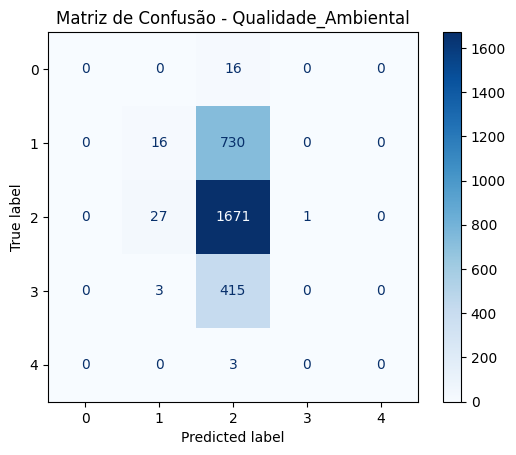

=== Métricas para Risco_Chuva_Acida ===
Acurácia: 0.8598, F1: 0.7950, Precision: 0.8795, Recall: 0.8598



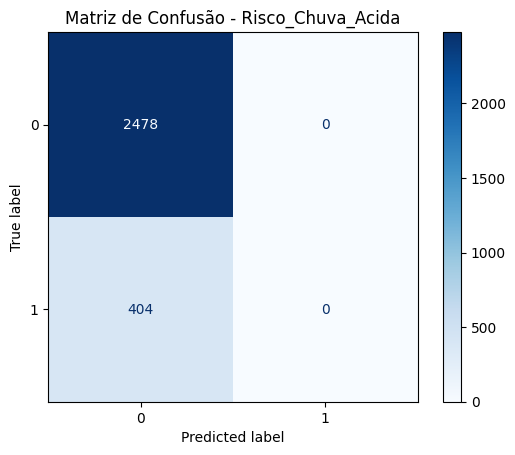

=== Métricas para Risco_Smog_Fotoquimico ===
Acurácia: 0.9688, F1: 0.9534, Precision: 0.9697, Recall: 0.9688



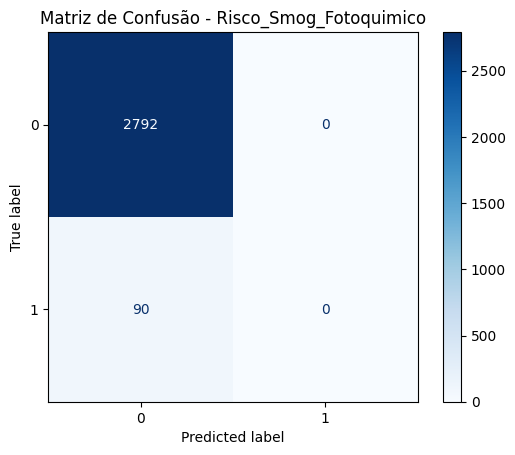

=== Métricas para Risco_Efeito_Estufa ===
Acurácia: 0.7672, F1: 0.6677, Precision: 0.7284, Recall: 0.7672



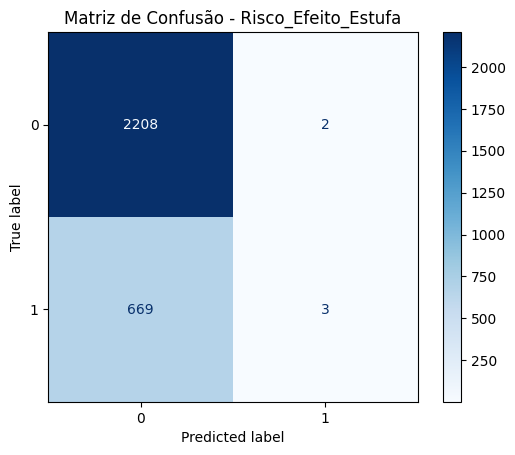

2025/09/27 21:59:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/27 21:59:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Exemplo de previsões:


Qualidade_Ambiental  Risco_Chuva_Acida  Risco_Smog_Fotoquimico  \
6559                    1                  0                       0   
1081                    2                  0                       0   
1407                    1                  0                       0   
5560                    2                  0                       0   
4670                    3                  0                       0   
5683                    2                  0                       0   
7243                    1                  0                       0   
8681                    1                  0                       0   
2264                    2                  1                       0   
1531                    2                  0                       0   
3558                    2                  0                       0   
8249                    3                  0                       0   
8778                    2                  0                       0   
5948                    3                  0                       0   
6826                    2                  0                       0   
882                     1                  0                       0   
1872                    2                  0                       0   
5960                    3                  0                       0   
8838                    2                  0                       0   
7323                    2                  0                       0   

      Risco_Efeito_Estufa  Qualidade_Ambiental_Predito  \
6559                    0                            2   
1081                    0                            2   
1407                    1                            2   
5560                    0                            2   
4670                    0                            2   
5683                    0                            2   
7243                    0                            2   
8681                    1                            2   
2264                    0                            2   
1531                    0                            2   
3558                    0                            2   
8249                    0                            2   
8778                    1                            2   
5948                    0                            2   
6826                    0                            2   
882                     0                            2   
1872                    0                            2   
5960                    0                            2   
8838                    1                            2   
7323                    0                            2   

      Risco_Chuva_Acida_Predito  Risco_Smog_Fotoquimico_Predito  \
6559                          0                               0   
1081                          0                               0   
1407                          0                               0   
5560                          0                               0   
4670                          0                               0   
5683                          0                               0   
7243                          0                               0   
8681                          0                               0   
2264                          0                               0   
1531                          0                               0   
3558                          0                               0   
8249                          0                               0   
8778                          0                               0   
5948                          0                               0   
6826                          0                               0   
882                           0                               0   
1872                          0                               0   
5960                          0                               0   
8

In [32]:
# ==================================================
# Configurações iniciais
# ==================================================
os.makedirs("miruns", exist_ok=True)
mlflow.set_experiment("miruns")

# Se X_train_scaled, X_test_scaled, y_train, y_test já estão prontos

# Nome do modelo
model_name = "RandomForest_MultiOutput"

# ==================================================
# Treinamento e avaliação
# ==================================================
with mlflow.start_run(run_name=model_name):

    # Inicializa modelo RandomForest com MultiOutput
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    model = MultiOutputClassifier(rf)
    model.fit(X_train_scaled, y_train)

    # Previsões
    y_pred = model.predict(X_test_scaled)

    # Itera sobre cada target
    for idx, col in enumerate(y_train.columns):
        acc = accuracy_score(y_test[col], y_pred[:, idx])
        f1 = f1_score(y_test[col], y_pred[:, idx], average='weighted', zero_division=1)
        precision = precision_score(y_test[col], y_pred[:, idx], average='weighted', zero_division=1)
        recall = recall_score(y_test[col], y_pred[:, idx], average='weighted', zero_division=1)

        print(f"=== Métricas para {col} ===")
        print(f"Acurácia: {acc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n")

        # Log das métricas
        mlflow.log_metric(f"{col}_accuracy", acc)
        mlflow.log_metric(f"{col}_f1_score", f1)
        mlflow.log_metric(f"{col}_precision", precision)
        mlflow.log_metric(f"{col}_recall", recall)

        # Matriz de Confusão
        classes_presentes = sorted(y_test[col].unique())  # rótulos existentes na coluna
        cm = confusion_matrix(y_test[col], y_pred[:, idx], labels=classes_presentes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_presentes)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Matriz de Confusão - {col}")

        # Salvar gráfico
        plot_path = os.path.join("miruns", f"confusion_matrix_{col}.png")
        plt.savefig(plot_path)
        plt.show()
        plt.close()

        # Log do gráfico
        mlflow.log_artifact(plot_path)

    # Log do modelo completo
    mlflow.sklearn.log_model(model, "random_forest_multioutput_model")

    # Exibir algumas previsões
    resultado = pd.DataFrame(y_test).copy()
    for idx, col in enumerate(y_test.columns):
        resultado[f"{col}_Predito"] = y_pred[:, idx]

    print("Exemplo de previsões:")
    display(resultado.head(20))


# 5.4- Treino com o modelo SVM Multilabel


=== Treinando modelo para Qualidade_Ambiental ===


2025/09/27 22:00:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Acurácia: 0.5895, F1: 0.4373, Precision: 0.7580, Recall: 0.5895


2025/09/27 22:00:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


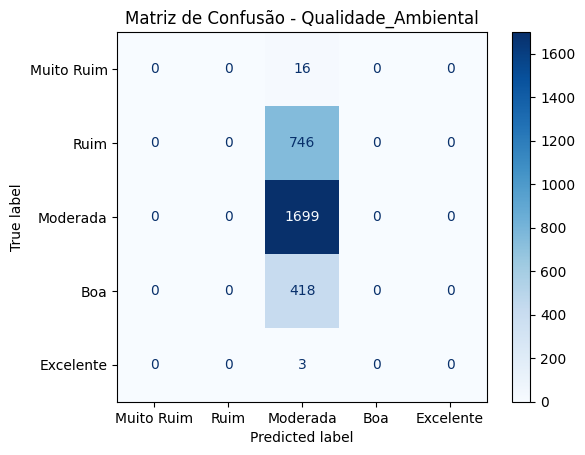

Exemplo de previsões:


Real  Predito Real_Label Predito_Label
0      1        2       Ruim      Moderada
1      2        2   Moderada      Moderada
2      1        2       Ruim      Moderada
3      2        2   Moderada      Moderada
4      3        2        Boa      Moderada
5      2        2   Moderada      Moderada
6      1        2       Ruim      Moderada
7      1        2       Ruim      Moderada
8      2        2   Moderada      Moderada
9      2        2   Moderada      Moderada
10     2        2   Moderada      Moderada
11     3        2        Boa      Moderada
12     2        2   Moderada      Moderada
13     3        2        Boa      Moderada
14     2        2   Moderada      Moderada
15     1        2       Ruim      Moderada
16     2        2   Moderada      Moderada
17     3        2        Boa      Moderada
18     2        2   Moderada      Moderada
19     2        2   Moderada      Moderada


=== Treinando modelo para Risco_Chuva_Acida ===


2025/09/27 22:00:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Acurácia: 0.8598, F1: 0.7950, Precision: 0.8795, Recall: 0.8598


2025/09/27 22:00:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


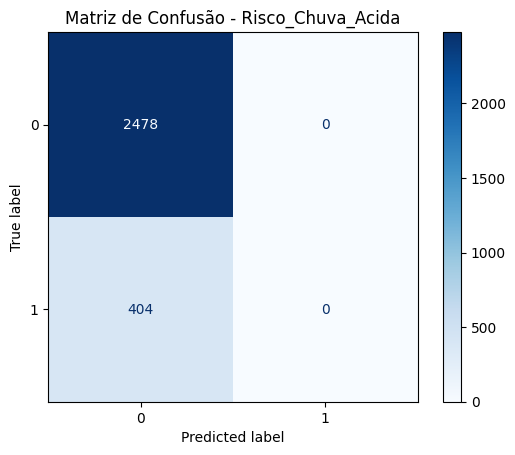

Exemplo de previsões:


Real  Predito
0      0        0
1      0        0
2      0        0
3      0        0
4      0        0
5      0        0
6      0        0
7      0        0
8      1        0
9      0        0
10     0        0
11     0        0
12     0        0
13     0        0
14     0        0
15     0        0
16     0        0
17     0        0
18     0        0
19     0        0


=== Treinando modelo para Risco_Smog_Fotoquimico ===


2025/09/27 22:00:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Acurácia: 0.9688, F1: 0.9534, Precision: 0.9697, Recall: 0.9688


2025/09/27 22:00:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


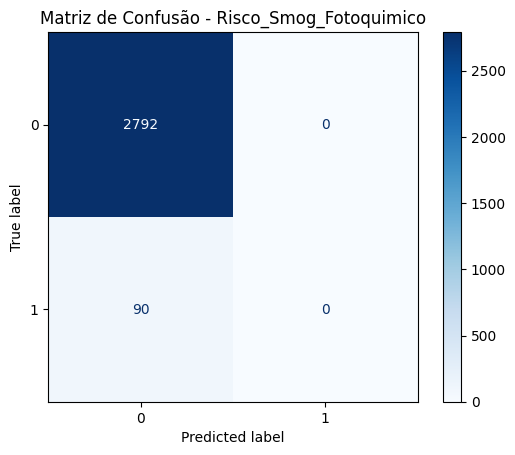

Exemplo de previsões:


Real  Predito
0      0        0
1      0        0
2      0        0
3      0        0
4      0        0
5      0        0
6      0        0
7      0        0
8      0        0
9      0        0
10     0        0
11     0        0
12     0        0
13     0        0
14     0        0
15     0        0
16     0        0
17     0        0
18     0        0
19     0        0


=== Treinando modelo para Risco_Efeito_Estufa ===


2025/09/27 22:01:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Acurácia: 0.7668, F1: 0.6656, Precision: 0.8212, Recall: 0.7668


2025/09/27 22:01:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


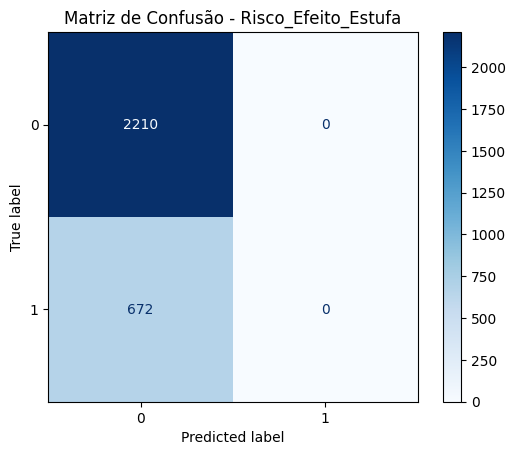

Exemplo de previsões:


Real  Predito
0      0        0
1      0        0
2      1        0
3      0        0
4      0        0
5      0        0
6      0        0
7      1        0
8      0        0
9      0        0
10     0        0
11     0        0
12     1        0
13     0        0
14     0        0
15     0        0
16     0        0
17     0        0
18     1        0
19     0        0

In [33]:
# Criar pasta para gráficos
os.makedirs("miruns", exist_ok=True)

# Lista das colunas alvo
target_cols = ['Qualidade_Ambiental', 'Risco_Chuva_Acida', 'Risco_Smog_Fotoquimico', 'Risco_Efeito_Estufa']

# Map para labels (ajustar apenas para Qualidade_Ambiental)
inv_mapping_qa = {0:'Muito Ruim',1:'Ruim',2:'Moderada',3:'Boa',4:'Excelente'}

# Experimento MLFlow
mlflow.set_experiment("miruns")

for col in target_cols:
    print(f"\n=== Treinando modelo para {col} ===")

    # Separar coluna
    X_train_col = X_train_scaled
    X_test_col = X_test_scaled
    y_train_col = y_train[col].values
    y_test_col = y_test[col].values

    model_name = f"SVM_{col}"
    with mlflow.start_run(run_name=model_name):
        # Inicializar e treinar SVM
        model = SVC(kernel='rbf', probability=True, random_state=42)
        model.fit(X_train_col, y_train_col)

        # Previsões
        y_pred = model.predict(X_test_col)

        # Métricas
        acc = accuracy_score(y_test_col, y_pred)
        f1 = f1_score(y_test_col, y_pred, average='weighted', zero_division=1)
        precision = precision_score(y_test_col, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test_col, y_pred, average='weighted', zero_division=1)

        print(f"Acurácia: {acc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

        # Log métricas no MLFlow
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)

        # Log do modelo
        mlflow.sklearn.log_model(model, "model")

        # Matriz de confusão
        cm = confusion_matrix(y_test_col, y_pred)
        if col == 'Qualidade_Ambiental':
            labels = list(inv_mapping_qa.values())
        else:
            labels = [0,1]  # binário
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Matriz de Confusão - {col}")

        # Salvar gráfico
        plot_path = os.path.join("miruns", f"confusion_matrix_{col}.png")
        plt.savefig(plot_path)
        plt.show()
        plt.close()

        # Log gráfico
        mlflow.log_artifact(plot_path)

        # Mostrar algumas previsões
        resultado = pd.DataFrame({
            "Real": y_test_col,
            "Predito": y_pred
        })
        if col == 'Qualidade_Ambiental':
            resultado["Real_Label"] = resultado["Real"].map(inv_mapping_qa)
            resultado["Predito_Label"] = resultado["Predito"].map(inv_mapping_qa)
        print("Exemplo de previsões:")
        display(resultado.head(20))


# 6- Teste do modelo RandomForest Multiclasses com ajustes de hiperparâmetros.


=== Métricas para Qualidade_Ambiental ===
Acurácia: 0.9233, F1: 0.9205, Precision: 0.9245, Recall: 0.9233


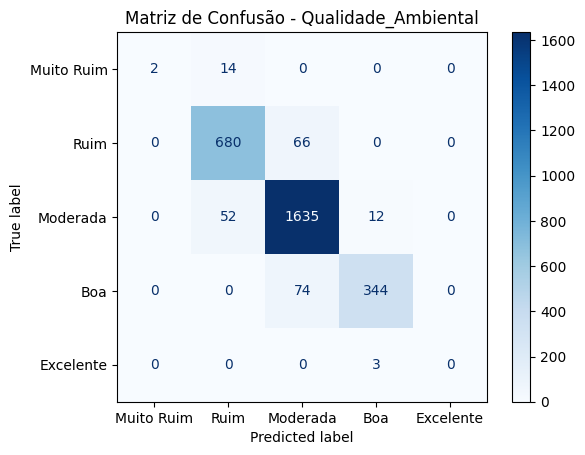


=== Métricas para Risco_Chuva_Acida ===
Acurácia: 0.8959, F1: 0.8684, Precision: 0.9061, Recall: 0.8959


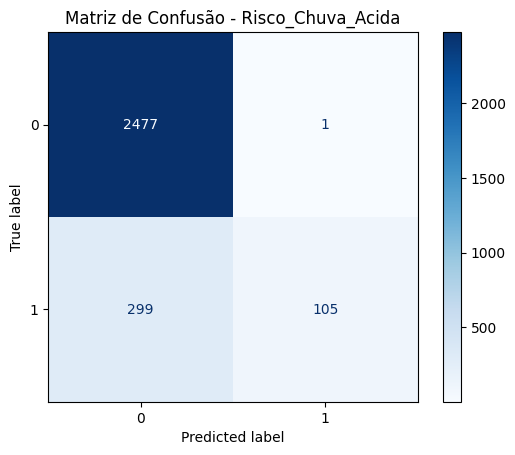


=== Métricas para Risco_Smog_Fotoquimico ===
Acurácia: 0.9997, F1: 0.9997, Precision: 0.9997, Recall: 0.9997


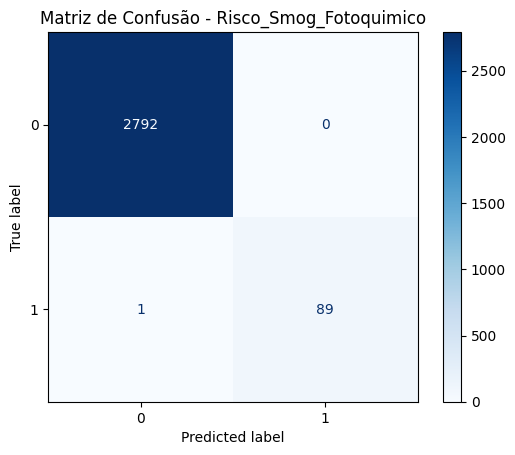


=== Métricas para Risco_Efeito_Estufa ===
Acurácia: 0.9997, F1: 0.9997, Precision: 0.9997, Recall: 0.9997


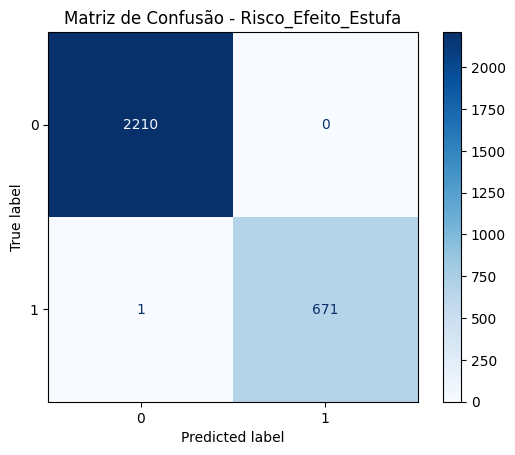

2025/09/27 22:02:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/27 22:02:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Exemplo de previsões:


Qualidade_Ambiental  Risco_Chuva_Acida  Risco_Smog_Fotoquimico  \
0                     1                  0                       0   
1                     2                  0                       0   
2                     1                  0                       0   
3                     2                  0                       0   
4                     3                  0                       0   
5                     2                  0                       0   
6                     1                  0                       0   
7                     1                  0                       0   
8                     2                  1                       0   
9                     2                  0                       0   
10                    2                  0                       0   
11                    3                  0                       0   
12                    2                  0                       0   
13                    3                  0                       0   
14                    2                  0                       0   
15                    1                  0                       0   
16                    2                  0                       0   
17                    3                  0                       0   
18                    2                  0                       0   
19                    2                  0                       0   

    Risco_Efeito_Estufa  Qualidade_Ambiental_Predito  \
0                     0                            1   
1                     0                            2   
2                     1                            1   
3                     0                            2   
4                     0                            3   
5                     0                            2   
6                     0                            1   
7                     1                            2   
8                     0                            2   
9                     0                            2   
10                    0                            2   
11                    0                            3   
12                    1                            2   
13                    0                            3   
14                    0                            2   
15                    0                            1   
16                    0                            2   
17                    0                            3   
18                    1                            2   
19                    0                            2   

    Risco_Chuva_Acida_Predito  Risco_Smog_Fotoquimico_Predito  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
5                           0                               0   
6                           0                               0   
7                           0                               0   
8                           0                               0   
9                           0                               0   
10                          0                               0   
11                          0                               0   
12                          0                               0   
13                          0                               0   
14                          0                               0   
15                          0                               0   
16                          0                               0   
17                          0                               0   
18                          0                               0   
19                          0                           

In [34]:
# ==================================================
# Random Forest MultiOutput - Versão Robusta
# ==================================================

# Criar pasta para salvar gráficos
os.makedirs("miruns", exist_ok=True)

# Map para converter números de volta para labels da Qualidade_Ambiental
inv_mapping = {0:'Muito Ruim', 1:'Ruim', 2:'Moderada', 3:'Boa', 4:'Excelente'}

# Nome do modelo
model_name = "RandomForest_MultiOutput_Robusto"

# Criar experimento MLFlow
mlflow.set_experiment("miruns")

with mlflow.start_run(run_name=model_name):

    # Modelo base mais robusto
    base_rf = RandomForestClassifier(
        n_estimators=400,        # número suficiente sem travar
        max_depth=None,          # deixa crescer até o fim
        min_samples_split=5,     # evita overfitting em ramos pequenos
        min_samples_leaf=3,      # força cada folha ter pelo menos 3 amostras
        max_features='sqrt',     # seleciona features diferentes por árvore
        class_weight='balanced', # dá mais peso às classes minoritárias
        random_state=42,
        n_jobs=-1
    )

    # MultiOutput para prever todos os targets de uma vez
    multi_rf = MultiOutputClassifier(base_rf, n_jobs=-1)

    # Treinar
    multi_rf.fit(X_train, y_train)

    # Prever
    y_pred = multi_rf.predict(X_test)

    # Avaliar cada target
    for idx, col in enumerate(y_train.columns):
        acc = accuracy_score(y_test[col], y_pred[:, idx])
        f1 = f1_score(y_test[col], y_pred[:, idx], average='weighted', zero_division=1)
        precision = precision_score(y_test[col], y_pred[:, idx], average='weighted', zero_division=1)
        recall = recall_score(y_test[col], y_pred[:, idx], average='weighted', zero_division=1)

        print(f"\n=== Métricas para {col} ===")
        print(f"Acurácia: {acc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

        # Logar no MLflow
        mlflow.log_metric(f"{col}_accuracy", acc)
        mlflow.log_metric(f"{col}_f1", f1)
        mlflow.log_metric(f"{col}_precision", precision)
        mlflow.log_metric(f"{col}_recall", recall)

        # Matriz de confusão
        disp = ConfusionMatrixDisplay.from_predictions(
            y_test[col],
            y_pred[:, idx],
            display_labels=list(inv_mapping.values()) if col == "Qualidade_Ambiental" else np.unique(y_test[col]),
            cmap=plt.cm.Blues
        )
        plt.title(f"Matriz de Confusão - {col}")
        plot_path = os.path.join("miruns", f"confusion_matrix_{col}.png")
        plt.savefig(plot_path)
        plt.show()
        plt.close()
        mlflow.log_artifact(plot_path)

    # Logar modelo inteiro
    mlflow.sklearn.log_model(multi_rf, "model")

    # Mostrar previsões de exemplo
    resultado = pd.DataFrame(y_pred, columns=[f"{c}_Predito" for c in y_train.columns])
    resultado = pd.concat([y_test.reset_index(drop=True), resultado], axis=1)
    print("\nExemplo de previsões:")
    display(resultado.head(20))


# 6.1- Métricas MLFlow

In [35]:
# ==========================
# Buscar o experimento
# ==========================
experiment_name = "miruns"
experiment = mlflow.get_experiment_by_name(experiment_name)
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

# ==========================
# Preparar DataFrame longo (para plotly)
# ==========================
models = ['Qualidade_Ambiental', 'Risco_Chuva_Acida', 'Risco_Smog_Fotoquimico', 'Risco_Efeito_Estufa']
metrics = ['accuracy', 'f1', 'precision', 'recall']

data = []
for _, row in runs.iterrows():
    run_id = row['run_id']
    for model in models:
        for metric in metrics:
            col_name = f'metrics.{model}_{metric}'
            if col_name in row:
                data.append({
                    'Run': run_id,
                    'Modelo': model,
                    'Métrica': metric,
                    'Valor': row[col_name]
                })

df_plot = pd.DataFrame(data)

# ==========================
# Plot interativo
# ==========================
fig = px.bar(
    df_plot,
    x="Modelo", y="Valor", color="Métrica", barmode="group",
    hover_data=["Run"], title="Desempenho dos Modelos MLflow"
)

fig.update_layout(
    title_font_size=22,
    xaxis_title="Modelo",
    yaxis_title="Score",
    yaxis=dict(range=[0,1]),
    legend_title="Métrica",
    template="plotly_white"
)

fig.show()


In [36]:
# ==================================================
# Relatório Final de Modelos - Experimento MLFlow
# ==================================================
# Nome do experimento
experiment_name = "miruns"

# Recuperar experimento
experiment = mlflow.get_experiment_by_name(experiment_name)
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

# Filtrar apenas métricas válidas (não nan)
metrics_cols = [c for c in runs.columns if c.startswith("metrics.")]
runs_metrics = runs[['run_id', 'tags.mlflow.runName', 'start_time'] + metrics_cols].copy()

# Converter timestamp
runs_metrics['start_time'] = pd.to_datetime(runs_metrics['start_time'], unit='ms')

# Função para criar o relatório em Markdown
def generate_final_report(runs_metrics):
    report = f"# Relatório Final de Modelos - Experimento '{experiment_name}'\n"
    report += f"Total de runs: {len(runs_metrics)}\n\n"

    for _, row in runs_metrics.iterrows():
        report += f"## Modelo: {row['tags.mlflow.runName']}\n"
        report += f"**Run ID:** {row['run_id']}\n\n"
        report += f"**Data/Hora:** {row['start_time']}\n\n"
        report += f"**Métricas:**\n"
        for col in metrics_cols:
            val = row[col]
            if pd.notna(val):
                report += f"- {col.replace('metrics.','')}: {val:.4f}\n"
        report += "\n---\n\n"
    return report

# Gerar relatório
final_report_md = generate_final_report(runs_metrics)

# Exibir como célula de texto Markdown
display(Markdown(final_report_md))


# Relatório Final de Modelos - Experimento 'miruns'
Total de runs: 7

## Modelo: RandomForest_MultiOutput_Robusto
**Run ID:** eacbb0e3941d46138d2bedeb61f20de2

**Data/Hora:** 2025-09-27 22:02:10.798000+00:00

**Métricas:**
- Risco_Smog_Fotoquimico_accuracy: 0.9997
- Risco_Efeito_Estufa_recall: 0.9997
- Risco_Efeito_Estufa_precision: 0.9997
- Risco_Chuva_Acida_f1: 0.8684
- Risco_Smog_Fotoquimico_recall: 0.9997
- Qualidade_Ambiental_f1: 0.9205
- Risco_Smog_Fotoquimico_f1: 0.9997
- Risco_Chuva_Acida_recall: 0.8959
- Risco_Efeito_Estufa_f1: 0.9997
- Risco_Efeito_Estufa_accuracy: 0.9997
- Qualidade_Ambiental_precision: 0.9245
- Risco_Chuva_Acida_accuracy: 0.8959
- Qualidade_Ambiental_accuracy: 0.9233
- Risco_Smog_Fotoquimico_precision: 0.9997
- Qualidade_Ambiental_recall: 0.9233
- Risco_Chuva_Acida_precision: 0.9061

---

## Modelo: SVM_Risco_Efeito_Estufa
**Run ID:** 8aed82dd5f6144498dba7fe24cae2df2

**Data/Hora:** 2025-09-27 22:00:58.071000+00:00

**Métricas:**
- recall: 0.7668
- precision: 0.8212
- f1_score: 0.6656
- accuracy: 0.7668

---

## Modelo: SVM_Risco_Smog_Fotoquimico
**Run ID:** 8418b9e31dc64db59d37da30a3f61903

**Data/Hora:** 2025-09-27 22:00:50.388000+00:00

**Métricas:**
- recall: 0.9688
- precision: 0.9697
- f1_score: 0.9534
- accuracy: 0.9688

---

## Modelo: SVM_Risco_Chuva_Acida
**Run ID:** d377a67347b141a39b74fae135864c54

**Data/Hora:** 2025-09-27 22:00:31.286000+00:00

**Métricas:**
- recall: 0.8598
- precision: 0.8795
- f1_score: 0.7950
- accuracy: 0.8598

---

## Modelo: SVM_Qualidade_Ambiental
**Run ID:** 82f6a0585a3149fa8ea9c6607237a671

**Data/Hora:** 2025-09-27 22:00:06.076000+00:00

**Métricas:**
- recall: 0.5895
- precision: 0.7580
- f1_score: 0.4373
- accuracy: 0.5895

---

## Modelo: RandomForest_MultiOutput
**Run ID:** 8e8cf959238941b9ace7015b7f55512c

**Data/Hora:** 2025-09-27 21:58:59.453000+00:00

**Métricas:**
- Risco_Smog_Fotoquimico_accuracy: 0.9688
- Risco_Efeito_Estufa_recall: 0.7672
- Risco_Efeito_Estufa_precision: 0.7284
- Risco_Smog_Fotoquimico_recall: 0.9688
- Risco_Chuva_Acida_recall: 0.8598
- Risco_Efeito_Estufa_accuracy: 0.7672
- Qualidade_Ambiental_precision: 0.4441
- Risco_Chuva_Acida_accuracy: 0.8598
- Qualidade_Ambiental_accuracy: 0.5854
- Risco_Smog_Fotoquimico_precision: 0.9697
- Qualidade_Ambiental_recall: 0.5854
- Risco_Chuva_Acida_precision: 0.8795
- Risco_Smog_Fotoquimico_f1_score: 0.9534
- Risco_Efeito_Estufa_f1_score: 0.6677
- Risco_Chuva_Acida_f1_score: 0.7950
- Qualidade_Ambiental_f1_score: 0.4450

---

## Modelo: MultiOutput_LogisticRegression
**Run ID:** e3144463a5824c72809524191de42727

**Data/Hora:** 2025-09-27 21:58:17.561000+00:00

**Métricas:**
- Risco_Smog_Fotoquimico_accuracy: 0.9688
- Risco_Efeito_Estufa_recall: 0.7668
- Risco_Efeito_Estufa_precision: 0.8212
- Risco_Chuva_Acida_f1: 0.7950
- Risco_Smog_Fotoquimico_recall: 0.9688
- Qualidade_Ambiental_f1: 0.4373
- Risco_Smog_Fotoquimico_f1: 0.9534
- Risco_Chuva_Acida_recall: 0.8598
- Risco_Efeito_Estufa_f1: 0.6656
- Risco_Efeito_Estufa_accuracy: 0.7668
- Qualidade_Ambiental_precision: 0.7580
- Risco_Chuva_Acida_accuracy: 0.8598
- Qualidade_Ambiental_accuracy: 0.5895
- Risco_Smog_Fotoquimico_precision: 0.9697
- Qualidade_Ambiental_recall: 0.5895
- Risco_Chuva_Acida_precision: 0.8795

---



# 6.2- Criando interface web via MLFlow local.

In [37]:
# Definir o diretório de experimentos
mlflow.set_tracking_uri("file:///mnt/data/mlruns")  # ajuste para um caminho que você queira salvar


In [38]:
# Criar ou acessar o experimento
experiment_name = "miruns"
mlflow.set_experiment(experiment_name)


2025/09/27 22:05:56 INFO mlflow.tracking.fluent: Experiment with name 'miruns' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///mnt/data/mlruns/773007652686566565', creation_time=1759010756142, experiment_id='773007652686566565', last_update_time=1759010756142, lifecycle_stage='active', name='miruns', tags={}>

# 6.2- Criando um tunel na web via ngrok

In [39]:
# Substitua pelo seu authtoken
ngrok.set_auth_token("33Hwqyv60riMPMT8pl1GxXPb0RU_7cCaea64JWDNdj2Wo2UTz")


In [40]:
# Parar possíveis sessões anteriores do ngrok
ngrok.kill()

# Criar túnel público para a porta 5000 (porta padrão do MLFlow UI)
public_url = ngrok.connect(5000)
print(f"MLFlow UI disponível em: {public_url}")

# Rodar MLFlow UI no notebook
subprocess.Popen(["mlflow", "ui", "--port", "5000"])


MLFlow UI disponível em: NgrokTunnel: "https://unrevolted-nonschematically-lakeisha.ngrok-free.dev" -> "http://localhost:5000"


<Popen: returncode: None args: ['mlflow', 'ui', '--port', '5000']>